### 🟨 Etapa 1: Carga y Exploración del Dataset

En esta etapa se importa el archivo, se carga el dataset y se explora la estructura general de los datos: número de filas, columnas y primeras observaciones.

In [ ]:
import pandas as pd

# Cargar archivo desde URL en GitHub (si es necesario usar local, subir archivo primero)
url = 'https://github.com/JeancarloSZR/Reto3/blob/main/BD_6P%20ENLA%20muestral%202024.xlsx?raw=true'
df = pd.read_excel(url)

print("Dimensiones del dataset:", df.shape)
df.head()

Dimensiones del dataset: (105534, 21)


,ID_IE,ID_SECCION,cor_est,cod_DRE,nom_dre,cod_UGEL,nom_ugel,codgeo,departamento,provincia,...,gestion2,area,sexo,M500_EM_6P_2024_CT,grupo_EM_6P_2024_CT,M500_EM_6P_2024_MA,grupo_EM_6P_2024_MA,peso_Lectura,peso_Mate,Estrato_DRE
0,1808,2,3,800,Cusco,80002,Acomayo,80201,CUSCO,ACOMAYO,...,1,1,1,479.153,2.0,507.684,2.0,8.585908,8.585908,8001
1,1808,2,4,800,Cusco,80002,Acomayo,80201,CUSCO,ACOMAYO,...,1,1,1,470.146,2.0,413.986,1.0,8.585908,8.585908,8001
2,1808,2,5,800,Cusco,80002,Acomayo,80201,CUSCO,ACOMAYO,...,1,1,1,469.963,2.0,419.353,1.0,8.585908,8.585908,8001
3,1808,2,6,800,Cusco,80002,Acomayo,80201,CUSCO,ACOMAYO,...,1,1,2,447.932,2.0,419.988,1.0,8.585908,8.585908,8001
4,1808,2,7,800,Cusco,80002,Acomayo,80201,CUSCO,ACOMAYO,...,1,1,1,519.260,2.0,549.413,3.0,8.585908,8.585908,8001


### 🟨 Etapa 2: Limpieza y Descripción Inicial

Revisamos valores nulos, tipos de datos y estadísticas básicas para conocer la estructura del dataset.

In [ ]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105534 entries, 0 to 105533
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID_IE                105534 non-null  int64  
 1   ID_SECCION           105534 non-null  int64  
 2   cor_est              105534 non-null  int64  
 3   cod_DRE              105534 non-null  int64  
 4   nom_dre              105534 non-null  object 
 5   cod_UGEL             105534 non-null  int64  
 6   nom_ugel             105534 non-null  object 
 7   codgeo               105534 non-null  int64  
 8   departamento         105534 non-null  object 
 9   provincia            105534 non-null  object 
 10  distrito             105534 non-null  object 
 11  gestion2             105534 non-null  int64  
 12  area                 105534 non-null  int64  
 13  sexo                 105534 non-null  int64  
 14  M500_EM_6P_2024_CT   102666 non-null  float64
 15  grupo_EM_6P_2024_

,0
ID_IE,0
ID_SECCION,0
cor_est,0
cod_DRE,0
nom_dre,0
cod_UGEL,0
nom_ugel,0
codgeo,0
departamento,0
provincia,0


### 🟨 Etapa 3: Distribución de la Variable Objetivo

Analizamos cómo se distribuyen los niveles ordinales de la variable `grupo_EM_6P_2024_MA`, que representa el desempeño en matemática.

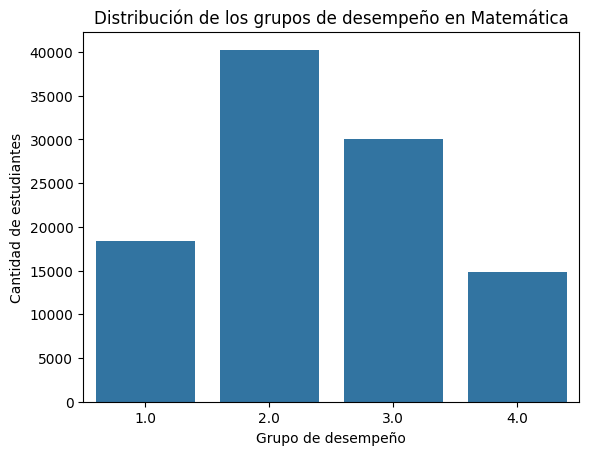

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='grupo_EM_6P_2024_MA')
plt.title('Distribución de los grupos de desempeño en Matemática')
plt.xlabel('Grupo de desempeño')
plt.ylabel('Cantidad de estudiantes')
plt.show()

### 🟨 Etapa 4: Boxplot de Puntajes por Grupo

Visualizamos cómo se comportan los puntajes de matemática en función de los grupos ordinales definidos.

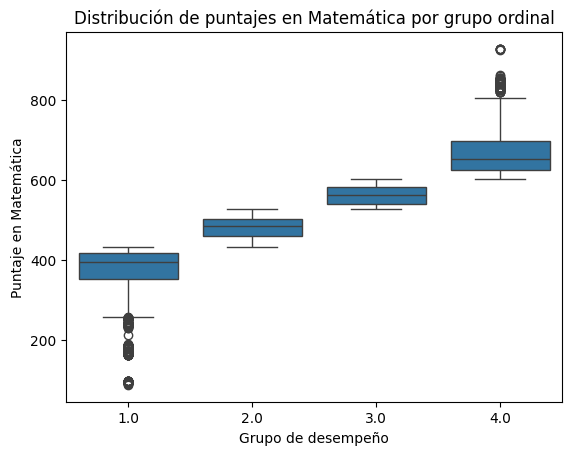

In [ ]:
sns.boxplot(x='grupo_EM_6P_2024_MA', y='M500_EM_6P_2024_MA', data=df)
plt.title('Distribución de puntajes en Matemática por grupo ordinal')
plt.xlabel('Grupo de desempeño')
plt.ylabel('Puntaje en Matemática')
plt.show()

### 🟨 Etapa 5: Preprocesamiento

Se seleccionan variables predictoras y la variable objetivo. Se realiza la separación en conjuntos de entrenamiento y prueba.

In [ ]:
from sklearn.model_selection import train_test_split

# Variables predictoras y objetivo
X = df.drop(columns=['grupo_EM_6P_2024_MA', 'grupo_EM_6P_2024_CT', 'M500_EM_6P_2024_MA', 'M500_EM_6P_2024_CT'])
y = df['grupo_EM_6P_2024_MA']

# Eliminar columnas no numéricas para este modelo inicial
X = X.select_dtypes(include=['int64', 'float64'])

# División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((84427, 12), (21107, 12))

### 🟨 Etapa 6: Entrenamiento con Random Forest

Entrenamos un modelo de Random Forest para predecir la variable ordinal.

In [ ]:
# Etapa 6: Entrenamiento con Random Forest
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Variables predictoras y objetivo

df_cleaned = df.dropna(subset=['grupo_EM_6P_2024_MA'])

X = df_cleaned.drop(columns=['grupo_EM_6P_2024_MA', 'grupo_EM_6P_2024_CT', 'M500_EM_6P_2024_MA', 'M500_EM_6P_2024_CT'])
y = df_cleaned['grupo_EM_6P_2024_MA']

# Eliminar columnas no numéricas para este modelo inicial
X = X.select_dtypes(include=['int64', 'float64'])

# División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

# Entrenar el modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Generar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)


### 🟨 Etapa 7: Evaluación del Modelo

Se calcula la precisión y se presenta la matriz de confusión.

In [ ]:
# Etapa 7: Evaluación del Modelo
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score # Import accuracy_score
import matplotlib.pyplot as plt

# Asegúrate de haber ejecutado previamente el código de la Etapa 6 para tener X_test, y_test, model y y_pred

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.4f}")


Precisión del modelo: 0.3624


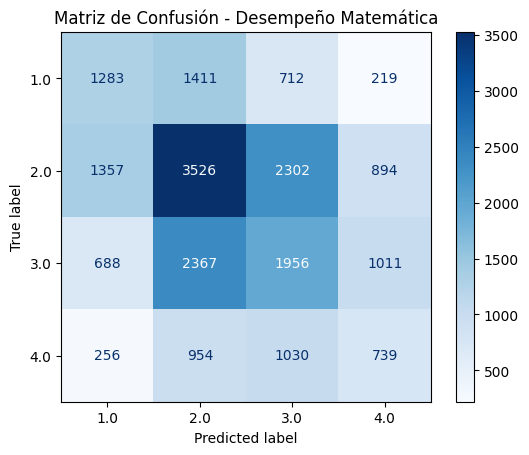

In [ ]:
# ✅ ETAPA: Evaluación con Matriz de Confusión
# Generamos matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizamos con etiquetas ordenadas
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y.unique()))
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - Desempeño Matemática")
plt.show()



### 🟨 Etapa 8: Importancia de las Variables

Visualizamos qué variables fueron más importantes para el modelo de Random Forest.

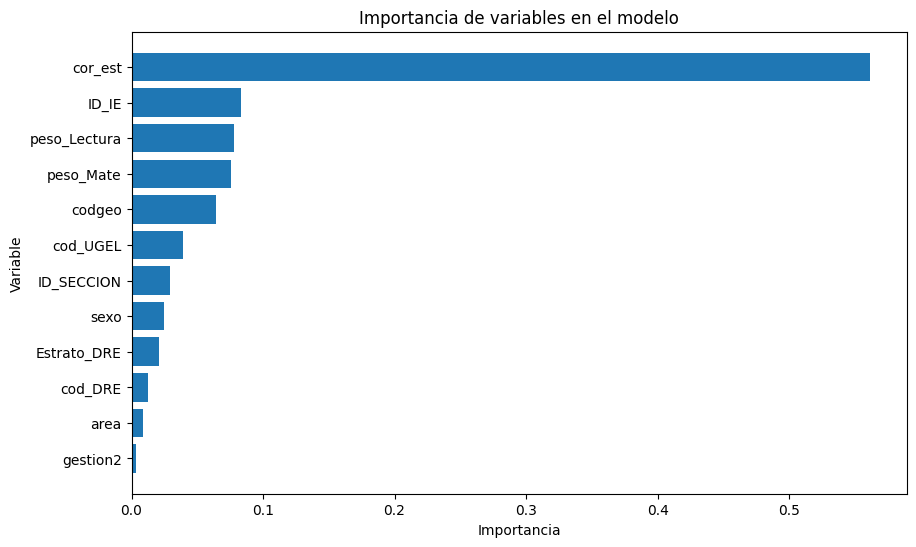

In [ ]:
# Etapa 8: Importancia de las Variables
import numpy as np
import matplotlib.pyplot as plt


importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.title('Importancia de variables en el modelo')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()

### 🟨 Etapa 10: Curva de Calibración del Modelo

La curva de calibración muestra qué tan bien se alinean las probabilidades predichas con las observadas. Idealmente, deberían seguir la línea diagonal.

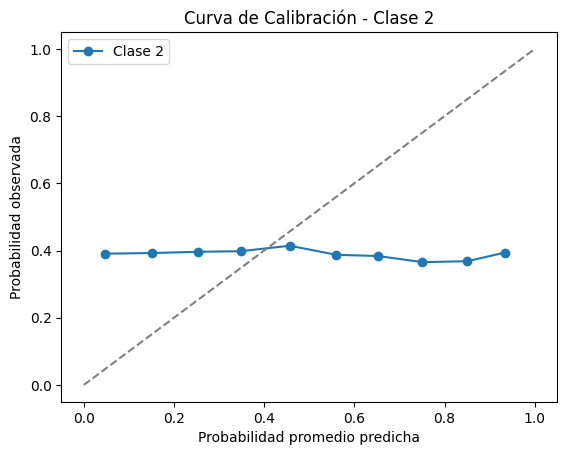

In [ ]:
from sklearn.calibration import calibration_curve

# Probabilidades predichas para un grupo (por ejemplo clase 2)
y_prob = model.predict_proba(X_test)

# Usamos la clase con mayor proporción si es ordinal (ajustable)
prob_true, prob_pred = calibration_curve((y_test==2).astype(int), y_prob[:,2], n_bins=10)

plt.plot(prob_pred, prob_true, marker='o', label='Clase 2')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Curva de Calibración - Clase 2')
plt.xlabel('Probabilidad promedio predicha')
plt.ylabel('Probabilidad observada')
plt.legend()
plt.show()

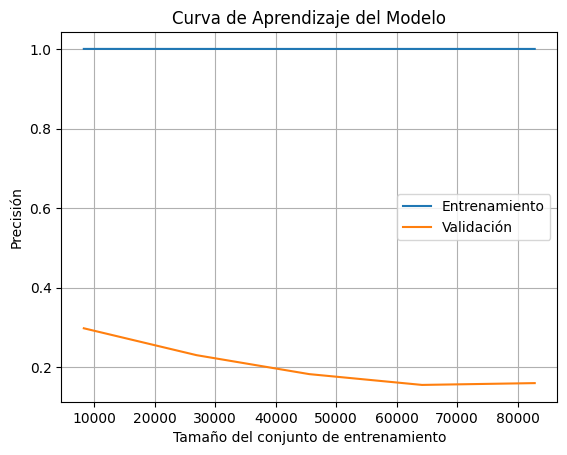

In [19]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label='Entrenamiento')
plt.plot(train_sizes, test_mean, label='Validación')
plt.title('Curva de Aprendizaje del Modelo')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()
